# Importing Necesary Libraries

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Reading the csv file as the dataframe

In [163]:
df=pd.read_csv('2.csv')

In [164]:
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc
5,vhigh,vhigh,two,two,med,high,unacc
6,vhigh,vhigh,two,two,big,low,unacc
7,vhigh,vhigh,two,two,big,med,unacc
8,vhigh,vhigh,two,two,big,high,unacc
9,vhigh,high,two,two,small,low,unacc


# Category Count

In [165]:
df['car'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: car, dtype: int64

In [166]:
df['buying'].value_counts()

low      432
med      432
vhigh    432
high     432
Name: buying, dtype: int64

In [167]:
df['doors'].value_counts()

three    432
four     432
5more    432
two      432
Name: doors, dtype: int64

In [168]:
df['persons'].value_counts()

four    576
two     576
more    576
Name: persons, dtype: int64

In [169]:
df['lug_boot'].value_counts()

med      576
big      576
small    576
Name: lug_boot, dtype: int64

In [170]:
df['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

#Null Values

In [171]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car         0
dtype: int64

# Data VIZ

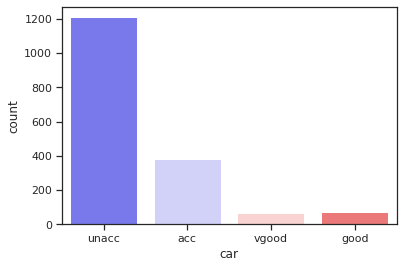

In [172]:
sns.set(style="ticks")
f = sns.countplot(x="car", data=df, palette="bwr")
plt.show()

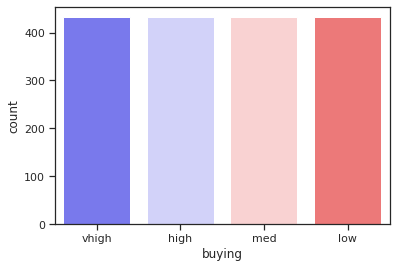

In [173]:
sns.set(style="ticks")
f = sns.countplot(x="buying", data=df, palette="bwr")
plt.show()

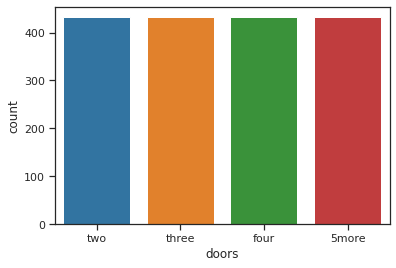

In [174]:
sns.set(style="ticks")
f = sns.countplot(x="doors", data=df, palette="tab10")
plt.show()

# Label Encoding

In [175]:
col=list(df.columns)

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

for i in col:
  df[i]= label_encoder.fit_transform(df[i]) 

**Data Viz Continued...**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


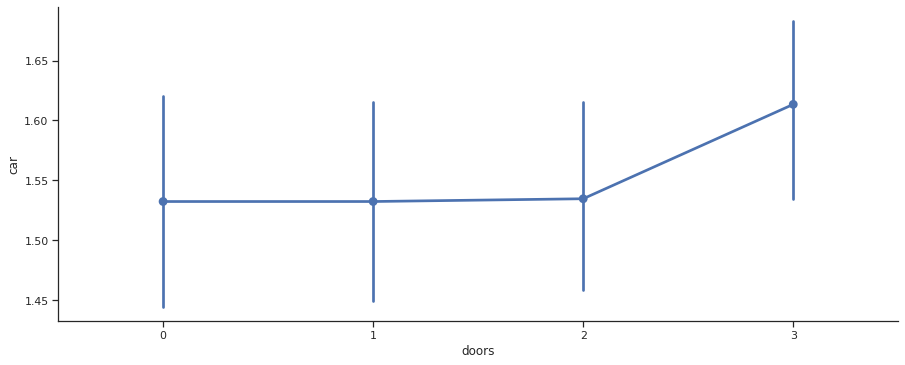

In [208]:
axes = sns.factorplot('doors','car', 
                      data=df, aspect = 2.5, );

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


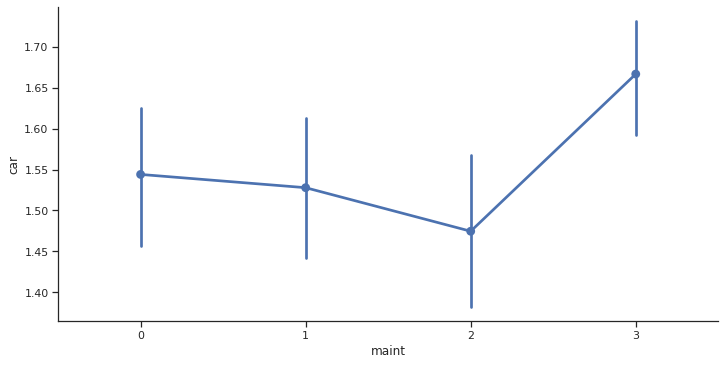

In [214]:
axes = sns.factorplot('maint','car', 
                      data=df, aspect = 2, );

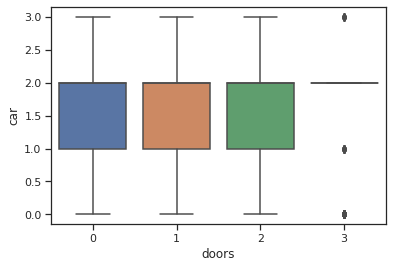

In [176]:
sns.boxplot(x='doors',y='car',data=df)

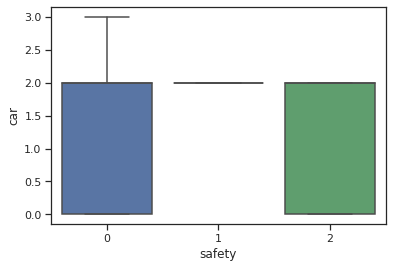

In [177]:
sns.boxplot(x='safety',y='car',data=df)

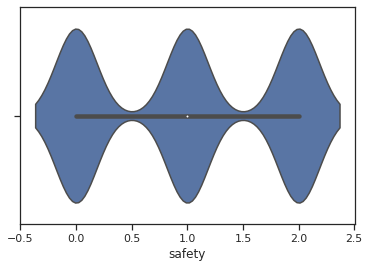

In [178]:
sns.violinplot(x='safety',data=df,size=6)

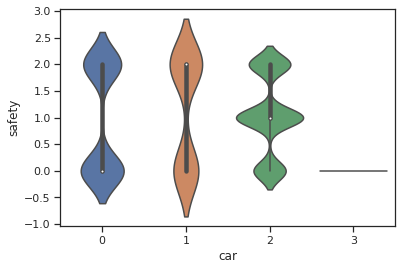

In [179]:
sns.violinplot(x='car',y='safety', data=df,size=6)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


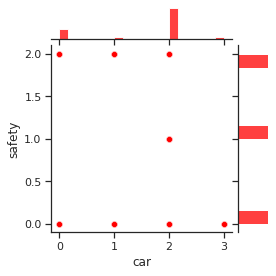

In [180]:
sns.jointplot(x='car',y='safety', data=df,size=4,color='red')

In [181]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,3,3,3,2,2,1,2
1,3,3,3,2,2,2,2
2,3,3,3,2,2,0,2
3,3,3,3,2,1,1,2
4,3,3,3,2,1,2,2


Taking **Car** as the **Target variable**

In [182]:
x=df.iloc[:,:-1].values
y=df.iloc[:,6].values


#JUST DOING **RANDOM Forest** for checking which feature are important , **SVM** is done below

In [183]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import time
import os


In [185]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.3010273109999986
[[112   3   0   0]
 [  4  20   0   1]
 [  7   0 359   0]
 [  0   0   0  13]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.87      0.80      0.83        25
           2       1.00      0.98      0.99       366
           3       0.93      1.00      0.96        13

    accuracy                           0.97       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



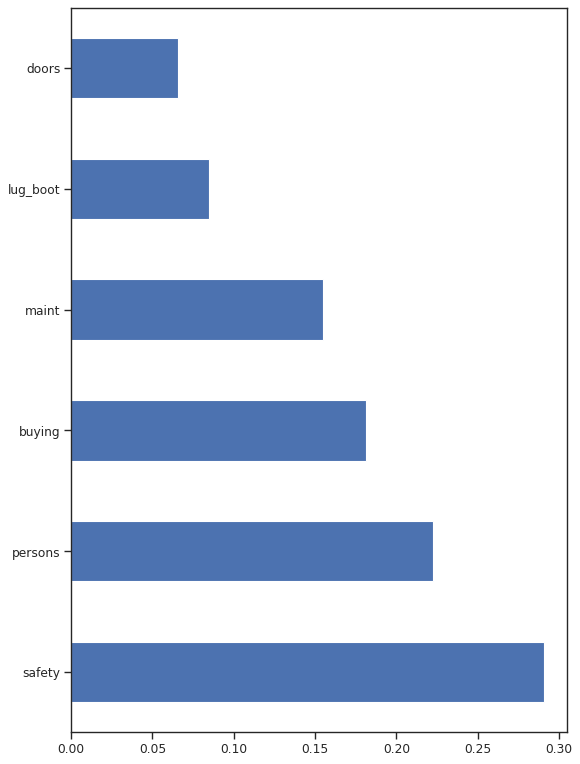

In [186]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
X=df.iloc[:,:-1]
feat_importances = pd.Series(trainedforest.feature_importances_, index= X.columns)
feat_importances.nlargest(19).plot(kind='barh')

#**Feature Scaling**

In [187]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

#**Support Vector Classifier using RBF Kernel**

In [188]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',degree=2 ,random_state = 0)
classifier.fit(X_Train, Y_Train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [189]:
# Predicting the Test set results
y_pred = classifier.predict(X_Test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)

#**Classification Report**

In [190]:
print(confusion_matrix(Y_Test,y_pred))
print(classification_report(Y_Test,y_pred))

[[112   0   3   0]
 [ 24   0   0   1]
 [ 12   0 354   0]
 [  2   0   0  11]]
              precision    recall  f1-score   support

           0       0.75      0.97      0.85       115
           1       0.00      0.00      0.00        25
           2       0.99      0.97      0.98       366
           3       0.92      0.85      0.88        13

    accuracy                           0.92       519
   macro avg       0.66      0.70      0.68       519
weighted avg       0.89      0.92      0.90       519



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
from sklearn.metrics import accuracy_score
print("Accurrcay:", accuracy_score(Y_Test, y_pred))

Accurrcay: 0.9190751445086706


In [192]:
Y_Test.shape

(519,)

In [193]:
print(Y_Test[:30])
print(y_pred[:30])

[2 0 2 2 2 0 2 2 0 2 2 2 0 2 2 1 2 2 2 0 1 2 2 2 2 2 2 2 2 2]
[2 0 2 2 2 0 2 2 0 2 2 2 0 2 2 0 2 2 2 0 0 2 2 2 0 2 2 2 2 2]


#Residual plot

Text(0, 0.5, 'Residual')

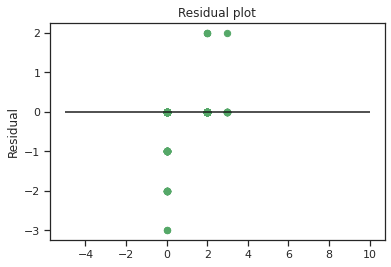

In [194]:

plt.scatter(y_pred, y_pred - Y_Test, c='g', s = 40)
plt.hlines(y=0, xmin=-5, xmax=10)
plt.title('Residual plot')
plt.ylabel('Residual')